In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("../data/processed/combined_data.xlsx")

In [3]:
c = list(df.columns)
print(type(c))
with open("columnas_mega_df.txt", "w") as f:
    for it in c:
        f.write(str(it)+'\n')

<class 'list'>


In [4]:
df.shape

(3174, 111)

In [5]:
df.loc[df["Min_x"] == "On matchday squad, but did not play", "Min_x"] = 0

def label_minutes(x):
    if float(x) == 0:
        return 0
    elif float(x) < 60:
        return 1
    else:
        return 2

df["target"] = df["Min_x"].apply(label_minutes)
df["target"].value_counts()

print(df["target"].value_counts())

target
2    1623
1     946
0     605
Name: count, dtype: int64


In [6]:
df.shape

(3174, 112)

In [19]:
features = [
    # Contexto del partido
    'Day_x',
    'Wk',
    'Venue', # booleano que inidica si home o away
    'opp_Rk',
    'opp_Squad',
    'team_Rk',
    'team_Squad',
    'team_Last 5',
    'opp_Last 5',
    'Start',
    
    # Información del jugador
    'player_id',
    'Age',
    'MP',
    'Starts',
    '90s',
    'Gls',
    'Ast',
    'G+A',
    'G-PK',
    'PKatt',
    'CrdY',
    'CrdR',
    'xG_y',
    'xAG',
    'npxG+xAG',
    'PrgC',
    'PrgP',
    'PrgR'
]


X = df[features]
y = df["target"]


### EDA

In [20]:
df = pd.concat([X, y], axis=1)
print(df.head())

  Day_x  Wk Venue  opp_Rk   opp_Squad  team_Rk  team_Squad team_Last 5  \
0   Sun   1  Home       8      Getafe       17  Celta Vigo   D D D D L   
1   Sat   2  Away      19    Mallorca       17  Celta Vigo   D D D D L   
2   Wed   6  Home       6       Betis       17  Celta Vigo   D D D D L   
3   Sun   3  Home       3  Villarreal       17  Celta Vigo   D D D D L   
4   Sun   4  Home      20      Girona       17  Celta Vigo   D D D D L   

  opp_Last 5 Start  ... PKatt CrdY  CrdR  xG_y  xAG  npxG+xAG  PrgC  PrgP  \
0  L W L D D     N  ...     0    0     0   0.0  0.1       0.1     5     0   
1  L L D L W     N  ...     0    0     0   0.0  0.1       0.1     5     0   
2  D L D W W     N  ...     0    0     0   0.0  0.1       0.1     5     0   
3  D L W W W     N  ...     0    0     0   0.0  0.1       0.1     5     0   
4  L D L D D     N  ...     0    0     0   0.0  0.1       0.1     5     0   

   PrgR  target  
0    15       1  
1    15       0  
2    15       0  
3    15       0  
4 

In [21]:
df.isnull().sum()

Day_x          0
Wk             0
Venue          0
opp_Rk         0
opp_Squad      0
team_Rk        0
team_Squad     0
team_Last 5    0
opp_Last 5     0
Start          0
player_id      0
Age            0
MP             0
Starts         0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PKatt          0
CrdY           0
CrdR           0
xG_y           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
target         0
dtype: int64

In [22]:
# Reemplazar NaN por 0
df = df.fillna(0)
# Verificar que no quedan NaN
print("Valores nulos después del reemplazo:")
print(df.isnull().sum())

Valores nulos después del reemplazo:
Day_x          0
Wk             0
Venue          0
opp_Rk         0
opp_Squad      0
team_Rk        0
team_Squad     0
team_Last 5    0
opp_Last 5     0
Start          0
player_id      0
Age            0
MP             0
Starts         0
90s            0
Gls            0
Ast            0
G+A            0
G-PK           0
PKatt          0
CrdY           0
CrdR           0
xG_y           0
xAG            0
npxG+xAG       0
PrgC           0
PrgP           0
PrgR           0
target         0
dtype: int64


In [24]:
import numpy as np

# Convierte edades del formato 'YY-DDD' (años-días) a float YY + DDD/366
# Ej: '19-256' -> 19 + 256/366

def age_str_to_float(a):
    if pd.isna(a):
        return np.nan
    # si ya es numérico
    if isinstance(a, (int, float, np.integer, np.floating)):
        return float(a)
    s = str(a).strip()
    if '-' in s:
        parts = s.split('-')
        if len(parts) >= 2:
            try:
                years = float(parts[0])
                days = float(parts[1])
                return years + days / 366.0
            except Exception:
                return np.nan
    # fallback: intentar convertir directamente
    try:
        return float(s)
    except Exception:
        return np.nan

X['Age'] = X['Age'].apply(age_str_to_float).astype(float)
print(X['Age'].head())

0    19.699454
1    19.699454
2    19.699454
3    19.699454
4    19.699454
Name: Age, dtype: float64


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day_x        3174 non-null   object 
 1   Wk           3174 non-null   int64  
 2   Venue        3174 non-null   object 
 3   opp_Rk       3174 non-null   int64  
 4   opp_Squad    3174 non-null   object 
 5   team_Rk      3174 non-null   int64  
 6   team_Squad   3174 non-null   object 
 7   team_Last 5  3174 non-null   object 
 8   opp_Last 5   3174 non-null   object 
 9   Start        3174 non-null   object 
 10  player_id    3174 non-null   object 
 11  Age          3174 non-null   float64
 12  MP           3174 non-null   int64  
 13  Starts       3174 non-null   int64  
 14  90s          3174 non-null   float64
 15  Gls          3174 non-null   int64  
 16  Ast          3174 non-null   int64  
 17  G+A          3174 non-null   int64  
 18  G-PK         3174 non-null   int64  
 19  PKatt 

In [28]:
from sklearn.preprocessing import LabelEncoder

## echar un ojo a esto

X = X.copy()
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

print(X.head())


   Day_x  Wk  Venue  opp_Rk  opp_Squad  team_Rk  team_Squad  team_Last 5  \
0      3   1      1       8          8       17           5            0   
1      2   2      0      19         11       17           5            0   
2      6   6      1       6          4       17           5            0   
3      3   3      1       3         19       17           5            0   
4      3   4      1      20          9       17           5            0   

   opp_Last 5  Start  ...  G-PK  PKatt  CrdY  CrdR  xG_y  xAG  npxG+xAG  PrgC  \
0          11      0  ...     0      0     0     0   0.0  0.1       0.1     5   
1           9      0  ...     0      0     0     0   0.0  0.1       0.1     5   
2           2      0  ...     0      0     0     0   0.0  0.1       0.1     5   
3           3      0  ...     0      0     0     0   0.0  0.1       0.1     5   
4           7      0  ...     0      0     0     0   0.0  0.1       0.1     5   

   PrgP  PrgR  
0     0    15  
1     0    15  
2     0 

In [29]:
X['opp_Last 5'].unique()

array([11,  9,  2,  3,  7,  1, 13,  4, 16,  6,  5,  8, 12, 15, 14,  0, 10,
       18, 17, 19])

### Training

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split usando las mismas reglas que antes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar XGBoost en lugar de RandomForest
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# Predicción y métricas
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.32      0.34       121
           1       0.42      0.43      0.43       189
           2       0.72      0.73      0.72       325

    accuracy                           0.56       635
   macro avg       0.50      0.49      0.50       635
weighted avg       0.56      0.56      0.56       635

[[ 39  58  24]
 [ 37  82  70]
 [ 34  55 236]]


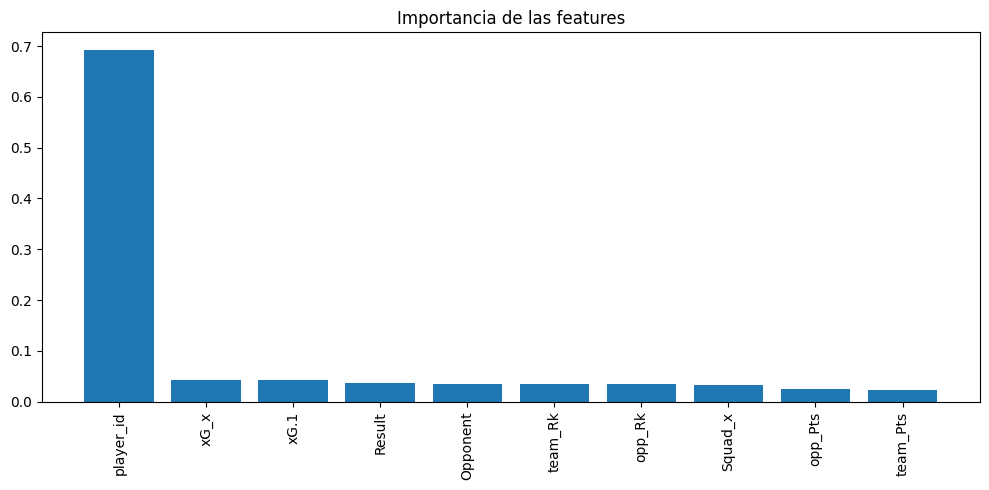

In [8]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Importancia de las features")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


#### Rebalanceando las clases

In [25]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy="mean")  # o "most_frequent" si hay muchas categorías
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)


In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, f1_score

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="mlogloss",
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, stratify=y_res, random_state=42
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))
print("F1 macro:", f1_score(y_test, y_pred, average="macro"))


              precision    recall  f1-score   support

           0       0.77      0.80      0.78       324
           1       0.66      0.62      0.64       325
           2       0.74      0.76      0.75       325

    accuracy                           0.73       974
   macro avg       0.72      0.73      0.72       974
weighted avg       0.72      0.73      0.72       974

F1 macro: 0.7243782679088038


In [28]:
from sklearn.model_selection import cross_val_score, KFold

# Definimos la validación cruzada con 5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Realizamos la validación cruzada
cv_scores = cross_val_score(xgb, X_res, y_res, cv=cv, scoring='f1_macro')

print("Resultados de la Validación Cruzada:")
print(f"F1 Scores por fold: {cv_scores}")
print(f"Media F1: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# También podemos ver otros métricas
cv_scores_acc = cross_val_score(xgb, X_res, y_res, cv=cv, scoring='balanced_accuracy')
print(f"\nBalanced Accuracy por fold: {cv_scores_acc}")
print(f"Media Balanced Accuracy: {cv_scores_acc.mean():.3f} (+/- {cv_scores_acc.std() * 2:.3f})")

Resultados de la Validación Cruzada:
F1 Scores por fold: [0.71199953 0.69933339 0.70795747 0.72500986 0.69983801]
Media F1: 0.709 (+/- 0.019)

Balanced Accuracy por fold: [0.71275481 0.70181577 0.71123537 0.72741855 0.70140405]
Media Balanced Accuracy: 0.711 (+/- 0.019)


In [29]:
from sklearn.metrics import f1_score, balanced_accuracy_score

print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))
print("F1 macro:", f1_score(y_test, y_pred, average="macro"))


Balanced accuracy: 0.7259480848369737
F1 macro: 0.7243782679088038


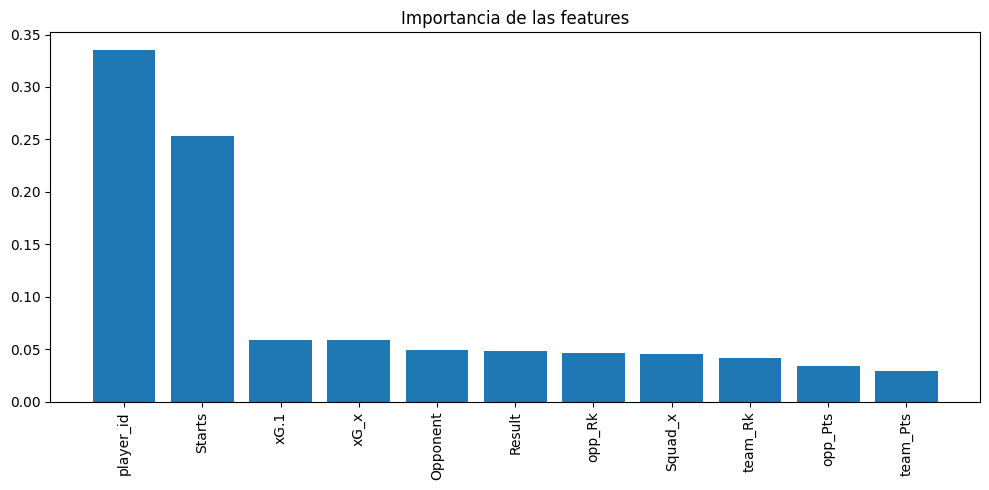

In [30]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Importancia de las features")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
